# In person scenario

### Adjacency Matrix update: 
Here, we would like to test the effect of a "in person scenario".
The characteristics of an in-person scenario compared to the basic one is the possibility to create stronger links between students during the simulation. 
First of all, it is necessary to implement a way to update the adjacency matrix during the run. This simulates the possibility to strenghten the links and interract mainly with the same students
Finally, some simulations will be run to check the effect over the attendace_rate


Comment on different trials: 
* I tried all different lambda parameters and also with just 1 update per lecture (and not 1 per step) the matrix saturates to 1 and shows some weird behavior (I can explain during next meeting)
* The silly update function with increments shows a better behavior 
* I checked the matrix at all steps and there are no bugs

In [22]:
%reload_ext autoreload
%autoreload 2

#AdjMatrix
import scipy as sc


#Phase Diagram
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ABM_model import AttendanceModel

#Adj Matrix Visualization
import pathpy as pp
from IPython.display import *
from mesa import Model
from mesa import Agent
import matplotlib.pyplot as plt
from visualization import AdjacencyGauss, neighbor, plot_adj_matrix, get_adj_matrix, initial_emotion_hist, plot_attendance, plot_agents, plot_attendance_step, Initialize_Adj_Matrix

In [23]:
# ==============================basic parameters=========================
'''
(max_steps % lecture_duration) should be equal to 0
teacher node only works as a sender
'''
num_agents = 50
# the adjacencyMatrix should be symmetric, the friendships are mutual, it doesn't matter what the diagonal values are because we won't use the diagonal values
seed = 32
random.seed(seed)

adjacencyMatrix = np.zeros((num_agents, num_agents))
adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
max_steps = 1000
lecture_duration = 50 
# according to the 'closure property' in the paper, delta_t should be less than 1/(|G|-1)
dt = 0.02
interactions_multiplier = 2
initial_emotion_mu = 0.5
initial_emotion_sigma = 0.2


# ========================updating adjacency matrix=======================
updateAdj = True
friendship_increase = lecture_duration/(max_steps*num_agents/3)
my_lambda = 0.1



# =======================parameters for teacher==========================
# if we set the expressiveness of teacher to 0, it has no effects on the network - we don't consider teacher node
expressiveness_teacher = 1
initial_emotion_teacher = 0.7
# this sigma is used to generate the sigma of the alphas from the teacher node to student nodes
teacher_send_alpha_sigma = 1
# lowerbound for the alpha between the teacher node and the students node
alpha_t_lowerbound = 0.1



# ===================parameters for "breakout room" policy=============
# parameters for the "breakout room" policy, if divided_into_groups=False, the group_num is forced to be 1 
divided_into_groups = False
group_num = 5


0.88
0.94
0.9
0.9
0.82
0.98
0.96
0.94
0.88
0.94
0.88
0.96
0.94
0.86
0.84
0.84
0.9
0.88
0.9
0.86
0.84
0.88
0.84
0.82
0.76
0.92
0.92
0.9
0.88
0.94
0.78
0.8
0.92
0.8
0.76
0.76
0.78
0.8
0.82
0.74
0.74
0.78
0.78
0.66
0.7
0.84
0.86
0.88
0.84
0.92
0.76
0.68
0.86
0.74
0.68
0.72
0.82
0.6
0.78
0.7
0.7
0.74
0.76
0.66
0.64
0.76
0.8
0.78
0.8
0.86
0.7
0.66
0.76
0.7
0.7
0.64
0.74
0.6
0.66
0.62
0.68
0.72
0.76
0.56
0.6
0.74
0.8
0.72
0.74
0.8
0.68
0.64
0.74
0.66
0.72
0.66
0.7
0.64
0.64
0.58
0.66
0.58
0.8
0.52
0.56
0.74
0.76
0.68
0.72
0.76
0.6
0.62
0.72
0.62
0.66
0.64
0.64
0.56
0.62
0.58
0.62
0.62
0.78
0.48
0.52
0.68
0.7
0.6
0.68
0.76
0.58
0.56
0.72
0.54
0.6
0.64
0.56
0.6
0.56
0.56
0.64
0.62
0.78
0.48
0.48
0.7
0.7
0.56
0.64
0.62
0.58
0.58
0.64
0.52
0.56
0.62
0.48
0.56
0.5
0.52
0.58
0.58
0.7
0.42
0.46
0.68
0.7
0.54
0.66
0.62
0.54
0.52
0.64
0.56
0.5
0.62
0.54
0.56
0.5
0.48
0.58
0.48
0.66
0.46
0.42
0.66
0.64
0.54
0.62
0.52
0.5
0.48
0.6
0.56
0.44
0.58
0.52
0.56
0.52
0.42
0.54
0.54
0.62
0.4
0.48
0.62
0.68
0.5

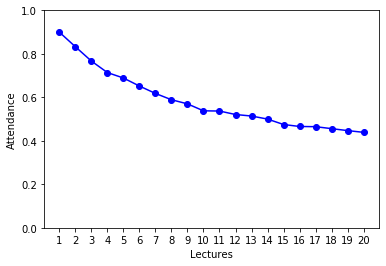

In [28]:
model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt, interactions_multiplier=interactions_multiplier)
model.run_model()

attempts=20   
lec_num = int(model.max_steps / model.lecture_duration)
lecture_steps = range(1, lec_num + 1)
attendances = []
yerr = []

for j in range(attempts):
    model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt, interactions_multiplier=interactions_multiplier)
    model.run_model()
    res = model.datacollector.get_model_vars_dataframe()['Attendance']
    attendances.append( [res[model.lecture_duration * i] for i in range(lec_num)] ) 

average = np.zeros(len(attendances[0]))
for j in range(len(attendances[0])): 
    values = []
    for k in range(attempts):
        average[j] += attendances[k][j]
        values.append(attendances[k][j])
        print(attendances[k][j])
    yerr.append(np.std(values))
    average[j] /= attempts


plt.plot(lecture_steps, average, '-bo')
plt.ylim(0, 1)
plt.gca().axes.set_xticks(lecture_steps)
plt.xlabel("Lectures")
plt.ylabel("Attendance")
plt.show()

0.94
0.88
0.9
0.86
0.78
0.94
0.82
0.86
0.88
0.9
0.92
0.9
0.88
0.96
0.88
0.86
0.98
0.92
0.9
0.96
0.86
0.8
0.84
0.84
0.66
0.92
0.72
0.82
0.9
0.86
0.9
0.94
0.8
0.9
0.88
0.74
0.92
0.78
0.84
0.9
0.84
0.76
0.74
0.72
0.68
0.86
0.68
0.8
0.84
0.86
0.84
0.88
0.74
0.84
0.74
0.7
0.88
0.72
0.78
0.8
0.82
0.7
0.76
0.64
0.62
0.8
0.66
0.66
0.76
0.8
0.78
0.8
0.7
0.78
0.7
0.62
0.8
0.66
0.74
0.76
0.82
0.68
0.7
0.6
0.58
0.78
0.6
0.64
0.76
0.78
0.76
0.82
0.62
0.78
0.7
0.6
0.74
0.62
0.74
0.7
0.8
0.64
0.64
0.52
0.54
0.76
0.6
0.64
0.7
0.7
0.68
0.78
0.6
0.8
0.68
0.6
0.7
0.64
0.7
0.72
0.78
0.62
0.62
0.48
0.6
0.74
0.58
0.68
0.7
0.66
0.64
0.76
0.66
0.74
0.74
0.6
0.64
0.64
0.7
0.72
0.7
0.62
0.6
0.48
0.54
0.66
0.56
0.6
0.66
0.64
0.64
0.68
0.68
0.72
0.72
0.6
0.62
0.62
0.68
0.72
0.7
0.64
0.56
0.44
0.54
0.68
0.5
0.58
0.66
0.58
0.62
0.66
0.68
0.68
0.72
0.56
0.58
0.54
0.66
0.64
0.68
0.6
0.56
0.46
0.5
0.64
0.46
0.6
0.64
0.62
0.62
0.64
0.68
0.68
0.66
0.56
0.58
0.5
0.62
0.62
0.68
0.56
0.54
0.46
0.48
0.62
0.5
0.62
0.66
0.6
0

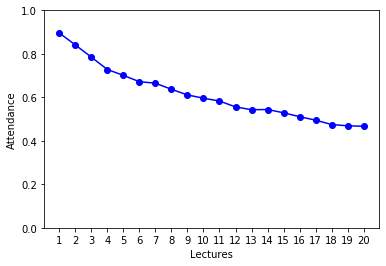

In [25]:

updateAdj = False

attempts=20 
lec_num = int(model.max_steps / model.lecture_duration)
lecture_steps = range(1, lec_num + 1)
attendances = []
yerr_base = []

for j in range(attempts):
    model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt, interactions_multiplier=interactions_multiplier)
    model.run_model()
    res = model.datacollector.get_model_vars_dataframe()['Attendance']
    attendances.append( [res[model.lecture_duration * i] for i in range(lec_num)] ) 

average_base = np.zeros(len(attendances[0]))
for j in range(len(attendances[0])):
    values = []
    for k in range(attempts):
        average_base[j] += attendances[k][j]
        values.append(attendances[k][j])
        print(attendances[k][j])
    yerr_base.append(np.std(values))
    average_base[j] /= attempts


plt.plot(lecture_steps, average_base, '-bo')
plt.ylim(0, 1)
plt.gca().axes.set_xticks(lecture_steps)
plt.xlabel("Lectures")
plt.ylabel("Attendance")
plt.show()

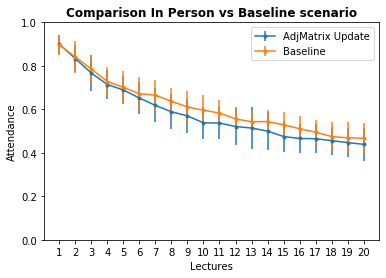

In [42]:
plt.errorbar(lecture_steps, average, yerr, label="AdjMatrix Update", marker = ".")
plt.errorbar(lecture_steps, average_base , yerr_base, label="Baseline", marker = ".")
plt.ylim(0, 1)
plt.gca().axes.set_xticks(lecture_steps)
plt.legend()
plt.title("Comparison In Person vs Baseline scenario", fontweight="bold")
plt.xlabel("Lectures")
plt.ylabel("Attendance")

plt.show()